# SERIALIZATION

In [8]:
# FILE FORMATS
#  - HDF5, Hierarchical Data Format (for weights).
#  - JSON (for structure).
#  - YAML (for structure).
model_folder = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/MODELS/"

### DEMO: JSON + HDF5

In [7]:
%%time
# MODEL BUILDING
import numpy as np
import pandas as pd
from keras.models import Sequential, model_from_json
from keras.layers import Dense
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, nb_epoch=150, batch_size=10, verbose=0)
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 78.91%
CPU times: user 5.58 s, sys: 23.1 ms, total: 5.6 s
Wall time: 5.61 s


In [9]:
# SAVE MODEL
model_json = model.to_json()
with open(model_folder+"pima.json", "w") as json_file:
    json_file.write(model_json) # save model in json.
model.save_weights("model.h5") # save weights in hdf5.
print "Model saved to disk"

Model saved to disk


In [11]:
# LOAD MODEL
json_file = open(model_folder+"pima.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json) # load model.
loaded_model.load_weights("model.h5") # load weights.
print "Moded loaded from disk"

Moded loaded from disk


In [12]:
%%time
# USE LOADED MODEL 
#  NB: MUST COMPILE FIRST!!
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 78.91%
CPU times: user 15.4 ms, sys: 4.6 ms, total: 20 ms
Wall time: 16.7 ms


### DEMO: JSON + YAML

In [13]:
%%time
# MODEL BUILDING
import numpy as np
import pandas as pd
from keras.models import Sequential, model_from_yaml
from keras.layers import Dense
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, nb_epoch=150, batch_size=10, verbose=0)
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)
model_yaml = model.to_yaml()
with open(model_folder+"pima.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml) # save model in json.
model.save_weights("model_yaml.h5") # save weights in hdf5.
print "Model saved to disk"
# LOAD MODEL
yaml_file = open(model_folder+"pima.yaml", "r")
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml) # load model.
loaded_model.load_weights("model_yaml.h5") # load weights.
print "Moded loaded from disk"
# USE LOADED MODEL 
#  NB: MUST COMPILE FIRST!!
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 78.91%
Model saved to disk
Moded loaded from disk
acc: 78.91%
CPU times: user 5.7 s, sys: 42.3 ms, total: 5.74 s
Wall time: 5.77 s


# CHECKPOINTING

In [15]:
# PURPOSES
#  - checkpoint each improvement during training.
#  - checkpoint very best model during training.
checkpoint_folder = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/"

### A. CHECKPOINTING IMPROVEMENTS
* result: a list of improvement.hdf5 files.

In [16]:
# MODEL BUILDING
import numpy as np
import matplotlib as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
checkpoint_file = "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
%%time
# SET UP CHECKPOINTS + TRAIN
checkpoint = ModelCheckpoint(checkpoint_folder+checkpoint_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X, Y, validation_split=.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

Epoch 00000: val_acc improved from -inf to 0.76772, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights-improvement-00-0.77.hdf5
Epoch 00001: val_acc improved from 0.76772 to 0.77165, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights-improvement-01-0.77.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc improved from 0.77165 to 0.77559, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights-improvement-05-0.78.hdf5
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc improved from 0.77559 to 0.77953, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights-improvement-10-0.78.hdf5
Epoch 00011: val

In [20]:
# EVALUATION
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 78.91%


### B. CHECKPOINTING BEST ONLY
* only 1 best.hdf5 file.

In [21]:
# MODEL BUILDING
import numpy as np
import matplotlib as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
checkpoint_file = "weights.best.hdf5"
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
%%time
# SET UP CHECKPOINTS + TRAIN
checkpoint = ModelCheckpoint(checkpoint_folder+checkpoint_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X, Y, validation_split=.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

Epoch 00000: val_acc improved from -inf to 0.67323, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights.best.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 0.67323 to 0.68504, saving model to /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/CHECKPOINTS/weights.best.hdf5
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epo

In [23]:
# EVALUATION
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 74.22%


### C. LOADING CHECKPOINT FILES

In [24]:
# MODEL BUILDING (ORIGINAL ARCHITECTURE W/O TRAIN)
import numpy as np
import matplotlib as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [25]:
# LOAD CHECKPOINT WEIGHTS
model.load_weights(checkpoint_folder+"weights.best.hdf5")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# LOAD DATA + EVALUATION
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 77.34%


# MODEL BEHAVIOR TRACKING

In [ ]:
# PURPOSES
#  - tracking speed of convergence.
#  - checking convergence status (y/n).
#  - monitoring training and preventing overlearning.

In [29]:
# MODEL BUILDING
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X, Y = dataset[:,0:8], dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
%%time
# SAVE HISTORY
history = model.fit(X, Y, validation_split=.33, nb_epoch=150, batch_size=10, verbose=0)
print history.history.keys() # contains: ['acc', 'loss', 'val_acc', 'val_loss'].

['acc', 'loss', 'val_acc', 'val_loss']
CPU times: user 3.07 s, sys: 7.38 ms, total: 3.08 s
Wall time: 3.08 s


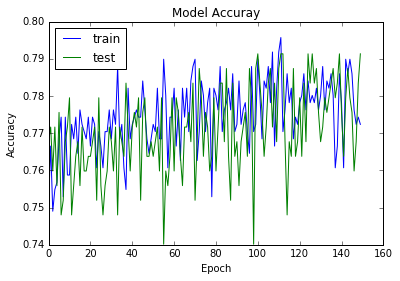

In [32]:
# HISTORY PLOTTING 1: ACCURACY
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuray')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

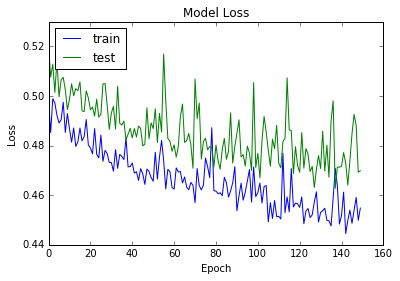

In [34]:
# HISTORY PLOTTING 2: LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DROPOUT REGULARIZATION

In [54]:
# IDEA
#  the technique randomly select neurons to ignore during training to avoid overfitting.
#   dropped-out neurons temporarily give their 'job' to the rest of the neurons 
#   (i.e. weights adjustment for better fitting), therefore no neuron is 'too special to be spared',
#   thus the model will not be overly reliant on specific weights of neurons.
#
# TECHNIQUE
#  a given fraction of neurons are dropped-out in each weight update cycle (e.g. 20%).
#
# TIPS
#  - 20%-50% is a good range for starting point.
#  - works well with large network.
#  - apply on all layers.
#  - use large lr with decay and large momentum.
#  - constrain the size of network weights (4 or 5 as cap).

### DEMO: SONAR DATA

#### A. BASELINE PERFORMANCE

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
path = '/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/sonar/sonar.csv'

In [41]:
# MODEL BUILDING
seed = 7
np.random.seed(seed)
dataframe = pd.read_csv(path, header=None)
dataset = dataframe.values
X, Y = dataset[:,0:60].astype(float), dataset[:,60]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
def create_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim=60, init='normal', activation='relu'))
    model.add(Dense(30, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    sgd = SGD(lr=.01, momentum=.8, decay=.0, nesterov=False)
        # lr: float >= 0. Learning rate.
        # momentum: float >= 0. Parameter updates momentum.
        # decay: float >= 0. Learning rate decay over each update.
        # nesterov: boolean. Whether to apply Nesterov momentum.
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, nb_epoch=50, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)

In [42]:
%%time
# EVALUATION
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print "Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)

Accuracy: 85.59% (5.16%)
CPU times: user 11.5 s, sys: 114 ms, total: 11.6 s
Wall time: 16.4 s


#### B1. DROPOUT (VISIBLE LAYER)

In [43]:
# DROPOUT MODEL GENERATER
def create_dropout1():
    model = Sequential()
    model.add(Dropout(.2, input_shape=(60,))) # 20% dropout rate.
    model.add(Dense(60, init='normal', activation='relu', W_constraint=maxnorm(3))) # individual weight cap at 3.
    model.add(Dense(30, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    sgd = SGD(lr=.1, momentum=.9, decay=.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [44]:
# MODEL BUILDING
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_dropout1, nb_epoch=50, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)

In [45]:
%%time
# EVALUATION
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print "Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)

Accuracy: 82.54% (10.82%)
CPU times: user 15.1 s, sys: 139 ms, total: 15.3 s
Wall time: 19.3 s


#### B2. DROPOUT (HIDDEN LAYER)

In [50]:
# DROPOUT MODEL GENERATER
def create_dropout2():
    model = Sequential()
    model.add(Dense(60, input_dim=60, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(.2))
    model.add(Dense(30, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    sgd = SGD(lr=.1, momentum=.9, decay=.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [51]:
# MODEL BUILDING
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_dropout2, nb_epoch=50, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)

In [52]:
%%time
# EVALUATION
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print "Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)

Accuracy: 80.74% (7.99%)
CPU times: user 15.9 s, sys: 169 ms, total: 16.1 s
Wall time: 19.7 s


# LEARNING RATE SCHEDULES

In [78]:
# PURPOSE & TECHNIQUE
#  also called 'learning rate annealing'. it changes learning rate according to a schedule. 
#   it has been shown to lift performance.
# 
# TYPES
#  - time-based: gradual decrease during training.
#  - drop-based: punctuated large drops at specific epochs..
#
# TIPS
#  - increase the initial learning rate.
#  - use large momentum.
#  - experiment with different schedules.

In [55]:
# IONOSPHERE DATA
#  - predictors: 34 parameters on sonar bounce-back on electrons.
#  - response: 2 class (good/bad of sonar bounce-back).
path = '/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/ionosphere/ionosphere.csv'

### A. TIME-BASED LEANRING RATE SCHEDULING

In [58]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

In [62]:
%%time
# MODEL BUILDING & RUNNING
seed = 7
np.random.seed(seed)
dataframe = pd.read_csv(path, header=None)
dataset = dataframe.values
X, Y = dataset[:,0:34].astype(float), dataset[:,34]
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))
epochs = 50
learning_rate = .1
decay_rate = learning_rate / epochs
momentum = .8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    # SGD learning rate function:
    # lr = lr * 1 / (1+decay*epoch).
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, Y, validation_split=.33, nb_epoch=epochs, batch_size=10, verbose=0)
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 99.43%
CPU times: user 1.36 s, sys: 8.35 ms, total: 1.36 s
Wall time: 1.36 s


### B. DROP-BASED LEARNING RATE SCHEDULING

In [ ]:
# DROP-BASED
#  lr = (lr_init * drop_rate)^{floor((1+epoch)/epoch_drop)}.

In [70]:
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

In [71]:
# LEARNING RATE SCHDULE CONTROLLER
def step_decay(epoch):
    initial_lrate = .1
    drop = .5 # drop by .5 per time.
    epochs_drop = 10.
    lrate = math.pow(initial_lrate*drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [72]:
# MODEL BUILDING
seed = 7
np.random.seed(seed)
dataframe = pd.read_csv(path, header=None)
dataset = dataframe.values
X, Y = dataset[:,0:34].astype(float), dataset[:,34]
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))
epochs = 50
learning_rate = .1
decay_rate = learning_rate / epochs
momentum = .8
sgd = SGD(lr=.0, momentum=.0, decay=.0, nesterov=False)
    # SGD learning rate function:
    # lr = lr * 1 / (1+decay*epoch).
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [73]:
# LEARNING SCHEDULE CALLBACK
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [77]:
%%time
# MODEL RUNNING & EVALUATION
model.fit(X, Y, validation_split=.33, nb_epoch=50, batch_size=10, callbacks=callbacks_list, verbose=0)
scores = model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

acc: 99.43%
CPU times: user 418 ms, sys: 3.2 ms, total: 421 ms
Wall time: 421 ms
